In [35]:
! pip install deap

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

from deap import base
from deap import creator
from deap import tools

In [37]:
# Problema de maximização do fitness
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
# Indivíduo derivado de uma lista
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [38]:
toolbox = base.Toolbox()
# Attribute generator
# gerador gera um atributo inteiro binário
toolbox.register("attr_bool", random.uniform, -20, 30)
# Structure initializers
# gerador de indivíduos considera 100 posições binárias na lista
toolbox.register("individual", tools.initRepeat, creator.Individual,
    toolbox.attr_bool, 30)
# população é uma lista de indivíduos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [39]:
def ackley_function(individual):
    x = individual[0]
    y = individual[1]

    a = 20
    b = 0.2
    c = 2 * math.pi

    firstSum = x **2 + y**2
    segundSum = math.cos(c * x) + math.cos(c * y)

    result = -a * math.exp(-b * math.sqrt(firstSum / 2)) - math.exp(segundSum / 2) + a + math.exp(1)
    return (result,)


In [60]:
# registra a função de avaliação criada
toolbox.register("evaluate", ackley_function)
# registra o cruzamento como crossover de 2 pontos
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low = -20, up = 30, eta =20.0)
# registra a mutação como a inversão do bits com probabilidade de 5%
toolbox.register("mutate", tools.mutPolynomialBounded, low = -20, up =30, eta =20.0, indpb = 1.0/30)
# regristra a seleção por torneio de 3 indivíduos
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selBest)


In [61]:
def main():
    # fixa a semente
    random.seed(64)

    # gera população de 300 indivíduos
    pop = toolbox.population(n=500)

    # cria um log para armazenar dados estatísticos
    log = tools.Logbook()

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    # CXPB  is the probability with which two individuals
    #       are crossed
    #
    # MUTPB is the probability for mutating an individual
    CXPB, MUTPB = 0.4, 0.3

    # Extracting all the fitnesses of
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0

    # Begin the evolution
    while min(fits) > 0 and g < 1000:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)

        # Número de indivíduos de elite para preservar
        num_elites = 5  # Você pode ajustar este valor

        # Selecionar os indivíduos de elite
        elites = tools.selBest(pop, num_elites)

        # Selecionar o restante da população (excluindo as elites)
        offspring = toolbox.select(pop, len(pop) - num_elites)

        # Clonar os indivíduos selecionados (incluindo elites)
        offspring = list(map(toolbox.clone, offspring)) + list(map(toolbox.clone, elites))  # Adicionando elites


        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring + elites  # Elites já estão em offspring

        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]

        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

        # Record statistics
        log.record(agen=g, fit=min(fits))

    #print(log)
    gen = log.select("agen")
    fit = log.select("fit")

    fig, ax = plt.subplots()
    line = ax.plot(gen, fit, "b--", label="Maximum Fitness")
    ax.set_xlabel("Generation")
    ax.set_ylabel("Fitness")
    plt.title("OneMax Problem")
    plt.show()

-- Generation 1 --
  Min 3.281643457532262
  Max 21.728921544370984
  Avg 16.873573121992507
  Std 3.7966611903450667
-- Generation 2 --
  Min 3.231104947797253
  Max 21.285958480649636
  Avg 13.159826834099691
  Std 4.5542398481494475
-- Generation 3 --
  Min 2.8348411214713534
  Max 20.264185858979936
  Avg 8.927533212678355
  Std 4.160107280776203
-- Generation 4 --
  Min 2.69902692131236
  Max 15.551013409674137
  Avg 5.378402720018821
  Std 2.7634318301148797
-- Generation 5 --
  Min 0.7296334275976837
  Max 13.726464768063316
  Avg 3.491483784354171
  Std 1.0819620335954987
-- Generation 6 --
  Min 0.7296334275976837
  Max 8.004678031762182
  Avg 3.0773193172365887
  Std 0.5803340991453707
-- Generation 7 --
  Min 0.34645804047007234
  Max 15.57120239149878
  Avg 2.849581176358962
  Std 1.1051638923758702
-- Generation 8 --
  Min 0.34645804047007234
  Max 14.46336461532172
  Avg 2.4774291373069204
  Std 1.1060547934246256
-- Generation 9 --
  Min 0.28238489371079867
  Max 14.3484

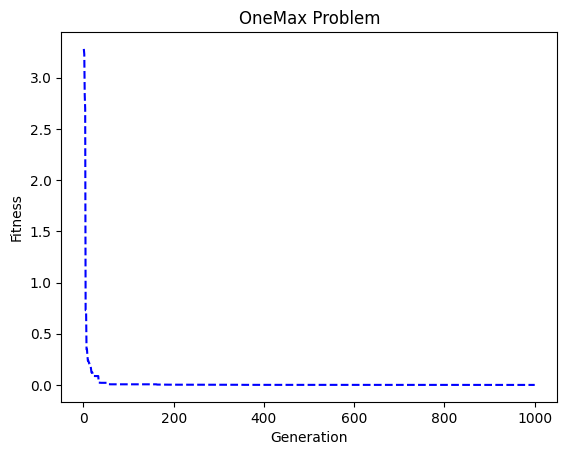

In [62]:
if __name__ == "__main__":
    main()